In [1]:

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
dataset_path = "/content/drive/MyDrive/5Animals"

idg = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,

    # data augmentation

    zoom_range=0.2,
    rotation_range=16,
    horizontal_flip=True
)

train_data = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset="training",
    target_size=(224,224),
    # save_to_dir="/content/drive/MyDrive/dataset/animal_test"
)

validation_data = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset="validation",
    target_size=(224,224)
)

Found 1045 images belonging to 5 classes.
Found 258 images belonging to 5 classes.


In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), strides=(2, 2), activation="relu", padding="same", input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), strides=(1, 1), activation="relu", padding="same"),
    layers.Conv2D(128, (3, 3),  strides=(2, 2), activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(256, (3, 3), strides=(1, 1), activation="relu" , padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(512, (3, 3), strides=(1, 1), activation="relu" ),

    layers.Flatten(),

    layers.Dense(1024, activation="relu"),
    layers.Dense(5, activation="softmax"),
])


In [12]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy']
              )


history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs=20)



Epoch 1/20
33/33 [==============================] - 38s 1s/step - loss: 1.5968 - accuracy: 0.2364 - val_loss: 1.5577 - val_accuracy: 0.3178
Epoch 2/20
33/33 [==============================] - 30s 912ms/step - loss: 1.4949 - accuracy: 0.3464 - val_loss: 1.4137 - val_accuracy: 0.3721
Epoch 3/20
33/33 [==============================] - 29s 893ms/step - loss: 1.3611 - accuracy: 0.3837 - val_loss: 1.2408 - val_accuracy: 0.4419
Epoch 4/20
33/33 [==============================] - 29s 898ms/step - loss: 1.2402 - accuracy: 0.4823 - val_loss: 1.3784 - val_accuracy: 0.3682
Epoch 5/20
33/33 [==============================] - 30s 900ms/step - loss: 1.2270 - accuracy: 0.4679 - val_loss: 1.1409 - val_accuracy: 0.5155
Epoch 6/20
33/33 [==============================] - 30s 901ms/step - loss: 1.1227 - accuracy: 0.5215 - val_loss: 1.1365 - val_accuracy: 0.5388
Epoch 7/20
33/33 [==============================] - 30s 899ms/step - loss: 1.0751 - accuracy: 0.5359 - val_loss: 1.1470 - val_accuracy: 0.5233
Ep

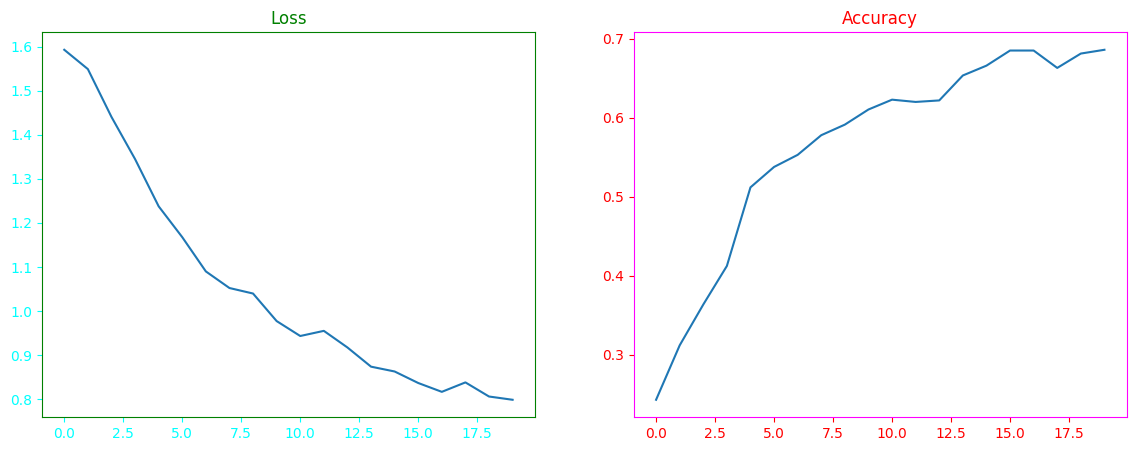

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(history.history['loss'])
ax1.set_title("Loss")
ax1.title.set_color('green')
ax1.tick_params(axis='x' , colors='cyan')
ax1.tick_params(axis='y' , colors='cyan')
ax1.spines['bottom'].set_color('green')
ax1.spines['right'].set_color('green')
ax1.spines['left'].set_color('green')
ax1.spines['top'].set_color('green')
ax2.plot(history.history['accuracy'])
ax2.set_title("Accuracy")
ax2.title.set_color('red')
ax2.tick_params(axis='x' , colors='red')
ax2.tick_params(axis='y' , colors='red')
ax2.spines['bottom'].set_color('magenta')
ax2.spines['right'].set_color('magenta')
ax2.spines['left'].set_color('magenta')
ax2.spines['top'].set_color('magenta')
plt.show()

